# Random Number Generation Plots


## General imports


In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
if (
    not os.path.exists("gfn-lm-tuning")
    and os.path.basename(os.getcwd()) != "gfn-lm-tuning"
):
    !git clone https://github.com/GFNOrg/gfn-lm-tuning
    %cd gfn-lm-tuning
elif os.path.basename(os.getcwd()) != "gfn-lm-tuning":
    %cd gfn-lm-tuning
else:
    !git pull

/home/mila/y/younesse.kaddar/gfn-lm-tuning


In [21]:
import matplotlib
import matplotlib.font_manager
import matplotlib.pyplot as plt
import shutil

import seaborn as sns
from IPython.display import display, Markdown

# # Remove the matplotlib cache
shutil.rmtree(matplotlib.get_cachedir())

fonts = matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext="ttf")

# print the names of all fonts
font_names = [matplotlib.font_manager.get_font(x).family_name for x in fonts]
print(font_names)

fonts = [f.name for f in matplotlib.font_manager.fontManager.ttflist]
print(fonts)
print("Times New Roman" in fonts)

# plt.rcParams["font.family"] = "Times New Roman"
# matplotlib.rc("font", family="Times New Roman")
matplotlib.rcParams["axes.unicode_minus"] = False

print(matplotlib.get_configdir())
print(matplotlib.get_cachedir())

['DejaVu Sans Mono', 'Times New Roman', 'DejaVu Serif', 'DejaVu Sans', 'DejaVu Sans', 'DejaVu Serif', 'DejaVu Sans Mono']
['DejaVu Sans', 'STIXGeneral', 'DejaVu Serif', 'STIXGeneral', 'DejaVu Serif', 'DejaVu Sans', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'STIXSizeFourSym', 'cmex10', 'DejaVu Sans', 'STIXSizeTwoSym', 'STIXGeneral', 'cmmi10', 'STIXSizeOneSym', 'DejaVu Sans', 'DejaVu Sans Display', 'STIXSizeThreeSym', 'DejaVu Serif Display', 'STIXSizeTwoSym', 'cmtt10', 'Times New Roman', 'STIXSizeFourSym', 'STIXSizeThreeSym', 'DejaVu Sans Mono', 'cmsy10', 'DejaVu Serif', 'STIXNonUnicode', 'STIXGeneral', 'DejaVu Serif', 'STIXNonUnicode', 'STIXNonUnicode', 'cmss10', 'DejaVu Sans Mono', 'cmb10', 'STIXNonUnicode', 'cmr10', 'STIXSizeOneSym', 'STIXSizeFiveSym', 'DejaVu Sans Mono', 'Times New Roman', 'DejaVu Serif', 'DejaVu Sans', 'DejaVu Sans', 'DejaVu Serif', 'DejaVu Sans Mono']
True
/home/mila/y/younesse.kaddar/.config/matplotlib
/home/mila/y/younesse.kaddar/.cache/matplotlib


# Load the data


In [4]:
import re
import unidecode

n_max = 100
intro_prompt = f"The following is a random integer drawn uniformly between 0 and "
prompt = f"{intro_prompt}{n_max}: "

In [5]:
filename_gfn = "plots/GFN_nb-numbers_512000_nb-NaNs_0_rng-GFN_gpt-j_bsz_8_grad_acc_8_lr_0.0005_warmup_steps_10_total_steps_2560_subtb_lambda_1.0_max_len_5_min_len_1_eval_interval_100_log_interval_10_seed_42.csv"
df_gfn = pd.read_csv(filename_gfn)
number_of_NaNs_gfn = int(re.findall(r"nb-NaNs_(\d+)", filename_gfn)[0])
number_of_nbs_gfn = int(re.findall(r"nb-numbers_(\d+)", filename_gfn)[0])
print(number_of_NaNs_gfn + number_of_nbs_gfn)

filename_vanilla = "plots/Vanilla_nb-numbers_498561_nb-NaNs_13439_rng-GFN_gpt-j_bsz_8_grad_acc_8_lr_0.0005_warmup_steps_10_total_steps_2560_subtb_lambda_1.0_max_len_5_min_len_1_eval_interval_100_log_interval_10_seed_42.csv"
df_vanilla = pd.read_csv(filename_vanilla)
number_of_NaNs_vanilla = int(re.findall(r"nb-NaNs_(\d+)", filename_vanilla)[0])
number_of_nbs_vanilla = int(re.findall(r"nb-numbers_(\d+)", filename_vanilla)[0])
print(number_of_NaNs_vanilla + number_of_nbs_vanilla)

filename_ppo = "plots/PPO_nb-numbers_510894_nb-NaNs_1106_gpt-j_batch_size_8_mini_batch_size_1_steps_512_learning_rate_1.41e-05_ppo_epochs_10_gradient_accumulation_steps_8_target_kl_0.1_init_kl_coef_0.2_seed_42.csv"
df_ppo = pd.read_csv(filename_ppo)
number_of_NaNs_ppo = int(re.findall(r"nb-NaNs_(\d+)", filename_ppo)[0])
number_of_nbs_ppo = int(re.findall(r"nb-numbers_(\d+)", filename_ppo)[0])
print(number_of_NaNs_ppo + number_of_nbs_ppo)

# # n_samples = length of the dfs (number of samples)

assert (
    number_of_NaNs_gfn + number_of_nbs_gfn
    == number_of_NaNs_vanilla + number_of_nbs_vanilla
    == number_of_NaNs_ppo + number_of_nbs_ppo
)

n_samples = number_of_NaNs_gfn + number_of_nbs_gfn
# print(n_samples)
# print(df_vanilla)
# print(df_ppo)

512000
512000
512000


In [6]:
def slugify(text):
    text = unidecode.unidecode(text).lower()
    return re.sub(r"[\W_]+", "-", text)


def plot_distribution_single(
    dist,
    n_max=512 * 8,
    model_name="Model",
    color="lightseagreen",
    xlims=None,
    number_of_NaNs=0,
    font="Times New Roman",
    filename="model",
):
    plt.rcParams["font.family"] = font
    plt.rcParams["font.size"] = 20  # Increase font size for tick labels

    display(Markdown(f"## {model_name}: Distribution of generated numbers"))

    sns.set_theme(style="whitegrid", font=font)

    bins = range(min(dist), max(dist) + 2)

    plot = sns.histplot(dist, color=color, linewidth=0, bins=bins, stat="probability")

    plot.set_xlabel(
        "Generated number", fontsize=20
    )  # Increase font size for x-axis label
    plot.set_ylabel(
        "Probability mass", fontsize=20
    )  # Increase font size for y-axis label

    if xlims is not None:
        plot.set_xlim(xlims)

    if not os.path.exists("plots"):
        os.makedirs("plots")
    plot.figure.savefig(f"plots/{slugify(model_name)}.pdf", bbox_inches="tight")
    plt.show()

## GFN: Distribution of generated numbers

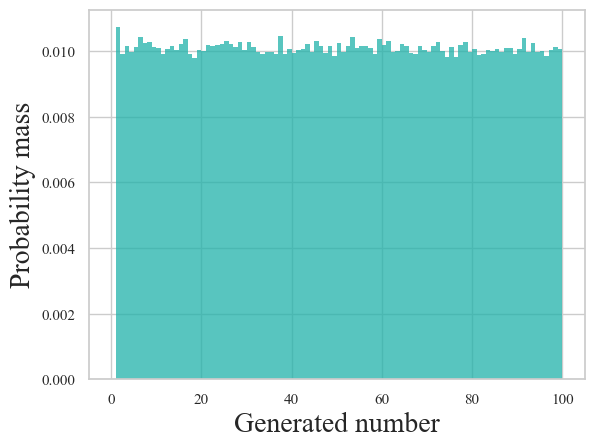

In [7]:
plot_distribution_single(
    df_gfn["Generated Numbers"],
    n_max=n_max,
    model_name="GFN",
    color="lightseagreen",
    number_of_NaNs=number_of_NaNs_gfn,
    xlims=(-5, n_max + 5),
)

## Vanilla: Distribution of generated numbers

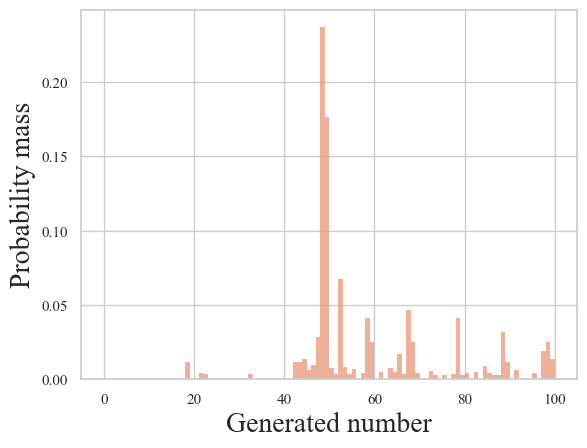

In [8]:
plot_distribution_single(
    df_vanilla["Generated Numbers"],
    n_max=n_max,
    model_name="Vanilla",
    color="darksalmon",
    number_of_NaNs=number_of_NaNs_vanilla,
    xlims=(-5, n_max + 5),
)

## PPO: Distribution of generated numbers

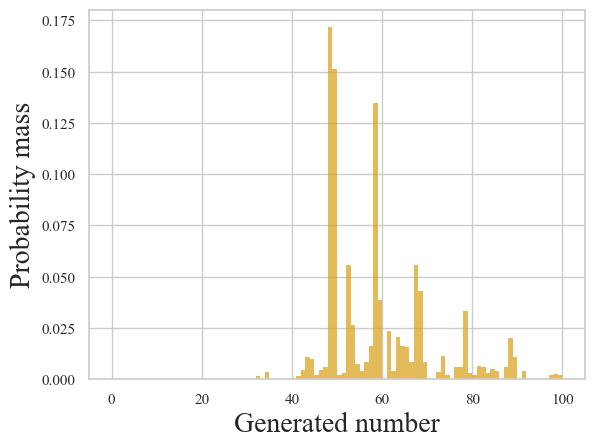

In [9]:
plot_distribution_single(
    df_ppo["Generated Numbers"],
    n_max=n_max,
    model_name="PPO",
    color="goldenrod",
    number_of_NaNs=number_of_NaNs_ppo,
    xlims=(-5, n_max + 5),
)

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], 

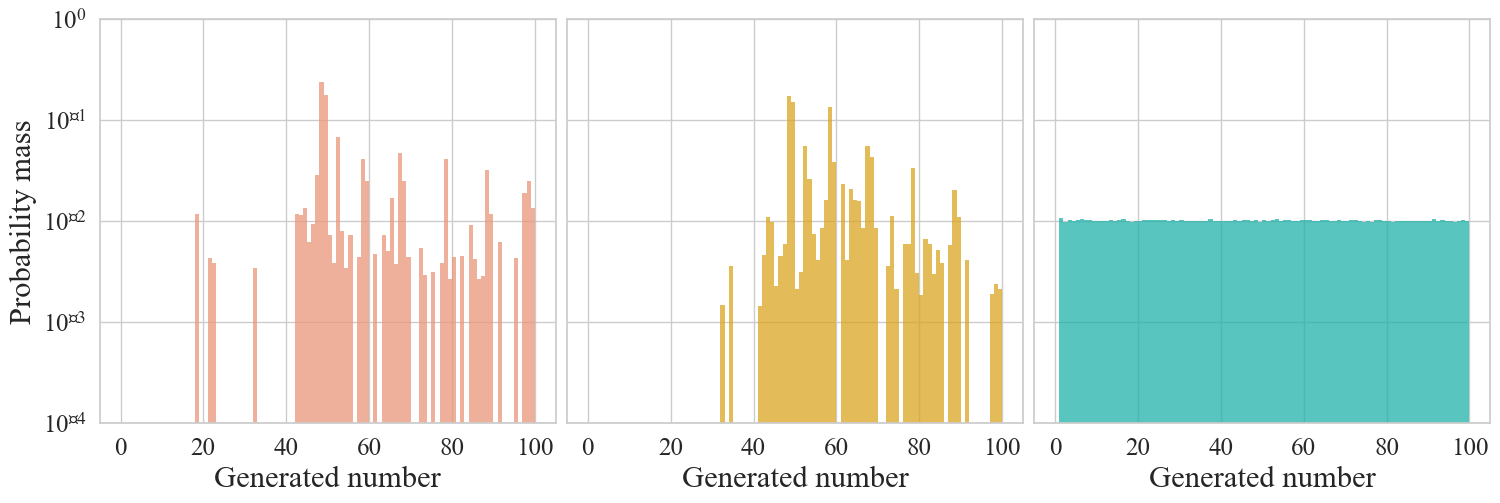

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], 

In [23]:
plt.rcParams["axes.unicode_minus"] = False


def plot_distribution(
    ax,
    dist,
    n_max=100,
    model_name="Model",
    color="lightseagreen",
    xlims=None,
    number_of_NaNs=0,
    font="Times New Roman",
    filename="model",
    total_numbers=512000,
):
    # plt.rcParams["font.family"] = font
    plt.rcParams["font.size"] = 16
    # plt.rcParams["axes.unicode_minus"] = False
    sns.set_theme(style="whitegrid", font=font)

    bins = range(min(dist), max(dist) + 2)

    plot = sns.histplot(
        dist, color=color, linewidth=0, bins=bins, stat="probability", ax=ax
    )

    plot.set_xlabel("Generated number", fontsize=22)
    plot.set_ylabel("Probability mass", fontsize=22)

    if xlims is not None:
        plot.set_xlim(xlims)

    plot.set_yscale("log")
    plot.set_ylim(0.0001, 1)

    # # custom y-axis ticks
    plot.set_yticks([0.0001, 0.001, 0.01, 0.1, 1])

    plot.tick_params(axis="both", which="major", labelsize=18)

    # valid_percentage = (total_numbers - number_of_NaNs) / total_numbers * 100
    # plot.set_title(f"{model_name}\n({valid_percentage:.1f}% of samples are valid numbers)")

    # if not os.path.exists("plots"):
    #     os.makedirs("plots")
    # plot.figure.savefig(f"plots/{slugify(model_name)}.pdf", bbox_inches="tight")


def plot_all_distributions(
    df_gfn, df_vanilla, df_ppo, n_max=100, font="Times New Roman"
):
    # plt.rcParams["font.family"] = font
    plt.rcParams["font.size"] = 16
    sns.set_theme(style="whitegrid", font=font)
    # plt.rcParams["axes.unicode_minus"] = False
    fig, axs = plt.subplots(1, 3, sharey=True, figsize=(15, 5))

    plot_distribution(
        axs[0],
        df_vanilla["Generated Numbers"],
        n_max=n_max,
        model_name="Base model",
        color="darksalmon",
        number_of_NaNs=number_of_NaNs_vanilla,
        xlims=(-5, n_max + 5),
        font=font,
    )

    plot_distribution(
        axs[1],
        df_ppo["Generated Numbers"],
        n_max=n_max,
        model_name="PPO",
        color="goldenrod",
        number_of_NaNs=number_of_NaNs_ppo,
        xlims=(-5, n_max + 5),
        font=font,
    )

    plot_distribution(
        axs[2],
        df_gfn["Generated Numbers"],
        n_max=n_max,
        model_name="GFlowNet",
        color="lightseagreen",
        number_of_NaNs=number_of_NaNs_gfn,
        xlims=(-5, n_max + 5),
        font=font,
    )

    plt.tight_layout(pad=0.5)
    plt.show()
    fig.savefig(f"plots/all_single-prompt.pdf", bbox_inches="tight")


plot_all_distributions(df_gfn, df_vanilla, df_ppo, n_max)

In [11]:
# KL divergence
from scipy.stats import entropy
from scipy.spatial.distance import jensenshannon
from numpy import sqrt

pmf_vanilla = (
    np.histogram(df_vanilla["Generated Numbers"], bins=n_max)[0] / number_of_nbs_vanilla
)
pmf_ppo = np.histogram(df_ppo["Generated Numbers"], bins=n_max)[0] / number_of_nbs_ppo
pmf_gfn = np.histogram(df_gfn["Generated Numbers"], bins=n_max)[0] / number_of_nbs_gfn
pmf_uniform = np.ones(n_max) / n_max

# add NaNs
pmf_vanilla = np.append(pmf_vanilla, number_of_NaNs_vanilla / number_of_nbs_vanilla)
pmf_ppo = np.append(pmf_ppo, number_of_NaNs_ppo / number_of_nbs_ppo)
pmf_gfn = np.append(pmf_gfn, number_of_NaNs_gfn / number_of_nbs_gfn)
pmf_uniform = np.append(pmf_uniform, 0)

kl_vanilla = entropy(pmf_vanilla, pmf_uniform)
kl_ppo = entropy(pmf_ppo, pmf_uniform)
kl_gfn = entropy(pmf_gfn, pmf_uniform)

print(f"KL divergence for Vanilla: {kl_vanilla:.2f}")
print(f"KL divergence for PPO: {kl_ppo:.2f}")
print(f"KL divergence for GFN: {kl_gfn}")

# Compute the square root of the Jensen-Shannon divergences
jsd_vanilla = sqrt(jensenshannon(pmf_vanilla, pmf_uniform))
jsd_ppo = sqrt(jensenshannon(pmf_ppo, pmf_uniform))
jsd_gfn = sqrt(jensenshannon(pmf_gfn, pmf_uniform))

print(f"Jensen-Shannon divergence for Vanilla: {jsd_vanilla}")
print(f"Jensen-Shannon divergence for PPO: {jsd_ppo}")
print(f"Jensen-Shannon divergence for GFN: {jsd_gfn}")

KL divergence for Vanilla: inf
KL divergence for PPO: inf
KL divergence for GFN: 0.010178762313648485
Jensen-Shannon divergence for Vanilla: 0.9029008411144476
Jensen-Shannon divergence for PPO: 0.8987895684788006
Jensen-Shannon divergence for GFN: 0.24340666872625852
